In [2]:
!git clone https://github.com/Pseudo-Lab/Tutorial-Book-Utils

Cloning into 'Tutorial-Book-Utils'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 45 (delta 18), reused 17 (delta 5), pack-reused 0
Receiving objects: 100% (45/45), 11.62 KiB | 2.90 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [4]:
!python Tutorial-Book-Utils/PL_data_loader.py --data GAN-Colorization

Downloading...
From: https://drive.google.com/uc?id=1dZxoBIWmbuF-Oy_XZoS1z9EjPJwkTmy6
To: /content/Victorian400-GAN-colorization-data.zip
100% 508M/508M [00:06<00:00, 80.5MB/s]
Victorian400-GAN-colorization-data.zip download complete!


In [5]:
!unzip -q Victorian400-GAN-colorization-data.zip

In [51]:
import os
import glob ### 리스트 뽑을 때 쓰는거. (여기서는 폴더 내에 이미지 몇개 있는지.)
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd

In [10]:
origin_dir = '/content/original'

resized_dir = '/content/resized'

gray_dir = '/content/gray'


print('origin_data 개수: ', len(os.listdir(origin_dir)))
print('resized_data 개수: ', len(os.listdir(resized_dir)))
print('gary_data 개수: ', len(os.listdir(gray_dir)))

origin_data 개수:  400
resized_data 개수:  400
gary_data 개수:  400


In [12]:
test_dir = '/content/test'

print(os.listdir(test_dir))
print('test 폴더 내 gray 개수: ', len(os.listdir('/content/test/gray')))
print('test 폴더 내 resized 개수: ', len(os.listdir('/content/test/resized')))

['gray', 'resized', '.DS_Store']
test 폴더 내 gray 개수:  6
test 폴더 내 resized 개수:  6


In [26]:
origin_files = sorted(glob.glob('/content/original/' + '*'))
resized_files = sorted(glob.glob('/content/resized/' + '*'))
gray_files = sorted(glob.glob('/content/gray/' + '*'))

In [27]:
print(origin_files[:2])

print(resized_files[:2])

print(gray_files[:2])

['/content/original/Victorian1.png', '/content/original/Victorian10.png']
['/content/resized/Victorian1.png', '/content/resized/Victorian10.png']
['/content/gray/Victorian1.png', '/content/gray/Victorian10.png']


In [29]:
## 이미지 읽어들이기 함수

def read_img(file_path):
  img_arr = cv2.imread(file_path)

  return cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)

/content/original/Victorian1.png
/content/resized/Victorian1.png
(714, 750, 3)
(256, 256, 3)


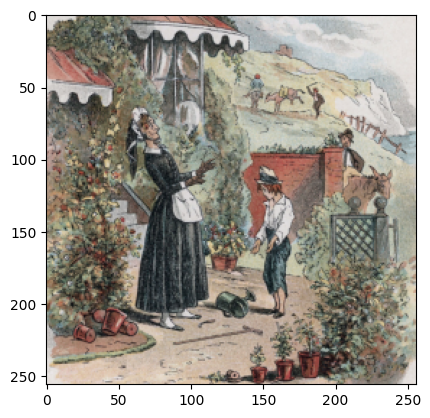

In [32]:
img_arr = read_img(origin_files[0])
img_arr1 = read_img(resized_files[0])


print(origin_files[0])
print(resized_files[0])

print(img_arr.shape)
print(img_arr1.shape)


#plt.imshow(img_arr)
plt.imshow(img_arr1)

/content/gray/Victorian117.png
(256, 256, 3)


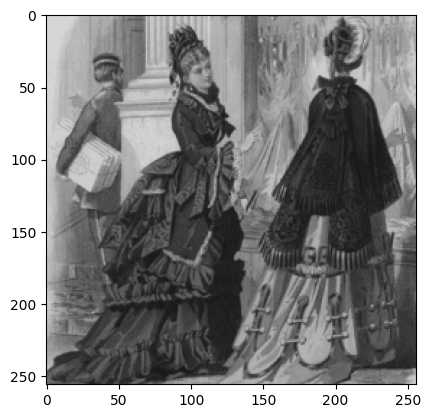

In [35]:
img_arr = read_img(gray_files[20])

print(gray_files[20])

print(img_arr.shape)


plt.imshow(img_arr)

##### resized 랑 gray 이미지 사이즈 같음.

In [37]:
img_arrs = []

img_num = 5

for idx in range(img_num):
  img_arrs.append(read_img(origin_files[idx]))
  img_arrs.append(read_img(resized_files[idx]))
  img_arrs.append(read_img(gray_files[idx]))


##### 각각 5개씩만 받아온다.

In [38]:
len(img_arrs)

15

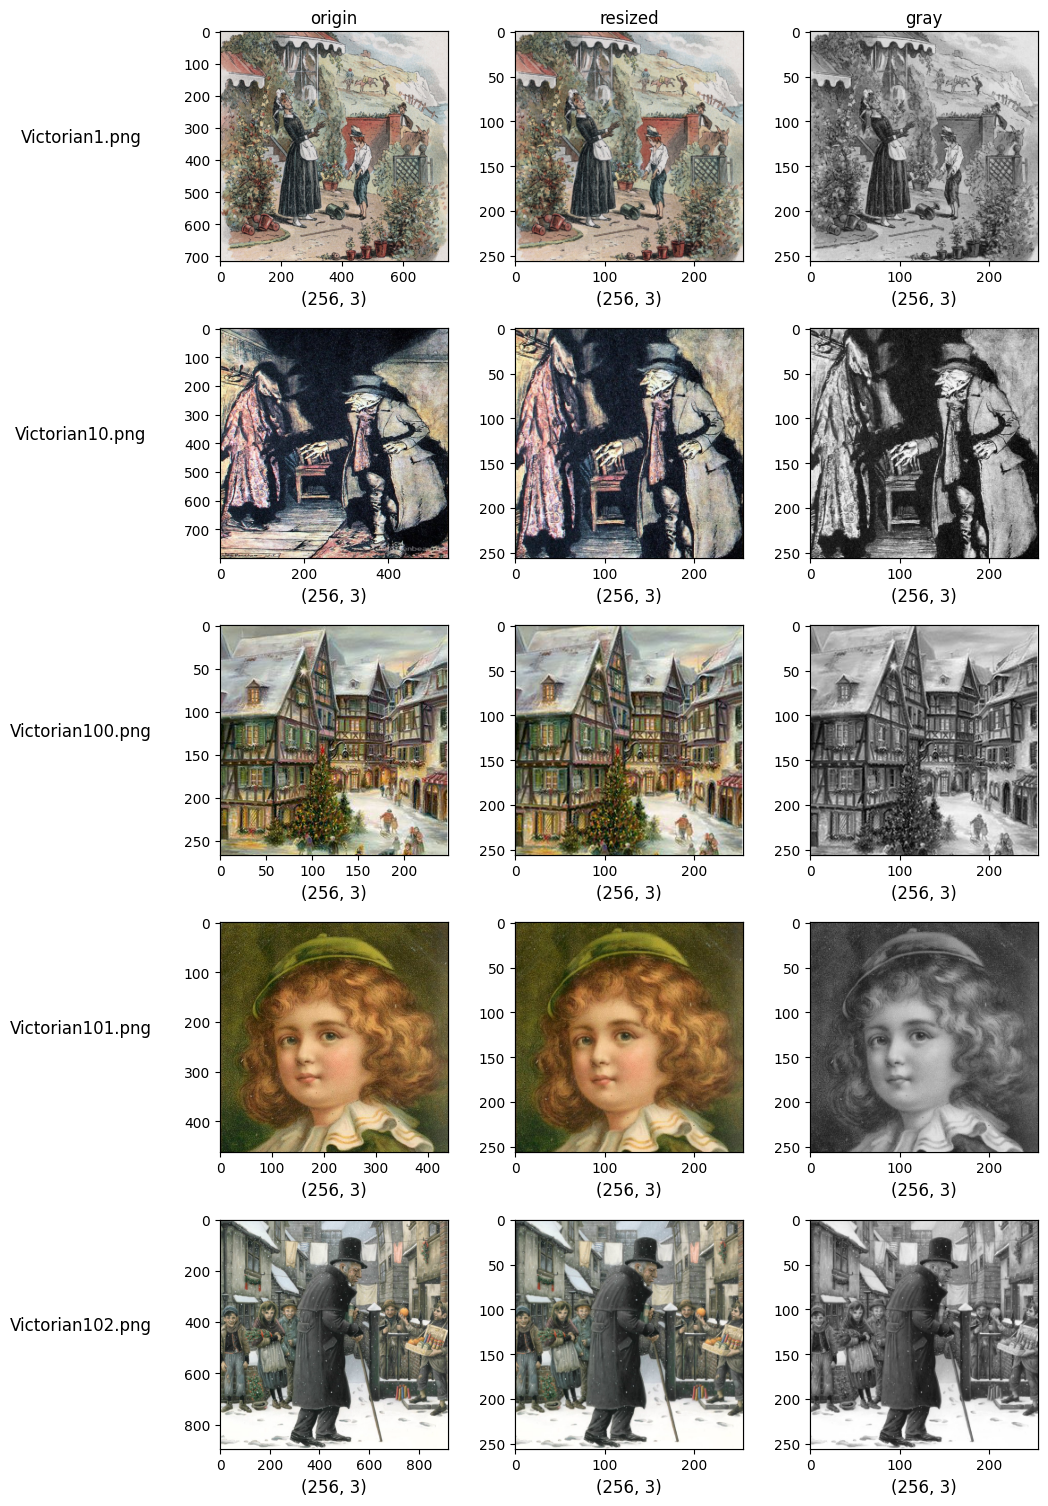

In [42]:
rows = img_num
columns = 3

fig,axes = plt.subplots(nrows = rows, ncols = columns, figsize = (columns * 3, rows * 3))


for num in range(1, rows * columns + 1):
  fig.add_subplot(rows, columns, num)

  idx = num - 1


  plt.imshow(img_arrs[idx], aspect = 'auto')
  plt.xlabel(f'{img_arr[idx].shape}', fontsize = 12)


fig.tight_layout() # 서브플롯 사이 간격 자동 조절.


for file_idx, ax in enumerate(axes[:, 0]):
  ax.set_ylabel(f'{sorted(os.listdir(origin_dir))[file_idx]}',
                rotation = 0, # 회전각도
                fontsize = 12,  # 폰트 크기 지정
                labelpad= 100) # 레이블 & 축 사이 패딩(간격)


cols = ['origin', 'resized', 'gray']



for folder_idx, ax in enumerate(axes[0]):
  ax.set_title(cols[folder_idx])


# xtick, ytick(눈금값) 제거.

for idx, ax in enumerate(axes.flat):
  ax.set_xticks([])
  ax.set_yticks([])


In [45]:
def get_mean_and_std(files):
  global_mean = 0
  global_var = 0

  #### 설정 이미지 평균값.
  for img in files:
    img_arr = read_img(img) / 255
    global_mean += img_arr.reshape(-1, 3).mean(axis = 0)

  global_mean /= len(files)


  ### 설정 이미지 표준편차(std)
  for img in files:
    img_arr = read_img(img) / 255
    global_var += ((img_arr.reshape(-1, 3) - global_mean) ** 2).mean(axis = 0)


  global_var /= len(files)
  global_std = np.sqrt(global_var)


  return global_var, global_std

In [47]:
### 위에 구한거 함수 적용.

color_mean, color_std = get_mean_and_std(resized_files)

color_mean, color_std

(array([0.06579309, 0.06496675, 0.05958417]),
 array([0.25650163, 0.25488575, 0.2440987 ]))

In [48]:
gray_mean, gray_std = get_mean_and_std(gray_files)

gray_mean, gray_std

(array([0.06278926, 0.06278926, 0.06278926]),
 array([0.25057785, 0.25057785, 0.25057785]))

같은 이미지의 경우, 모든 픽셀값 같은 값을 가져서, 그레이스케일 후에도 평균값, 표준편차 값 같다.

In [49]:
color_img = read_img(resized_files[0]) / 255
gray_img = read_img(gray_files[0]) / 255

In [52]:
### R, G, B 개별 요약 값 함수.

def get_statistics(arr):

  return pd.DataFrame(arr.reshape(-1, 3), columns = ['R', 'G', 'B']).describe()

In [53]:
get_statistics(color_img)

,R,G,B
count,65536.000000,65536.000000,65536.000000
mean,0.564941,0.537205,0.493146
std,0.208751,0.203116,0.198431
min,0.027451,0.039216,0.058824
25%,0.411765,0.380392,0.333333
50%,0.584314,0.533333,0.478431
75%,0.745098,0.709804,0.650980
max,0.929412,0.913725,0.909804


In [54]:
get_statistics(gray_img)

,R,G,B
count,65536.000000,65536.000000,65536.000000
mean,0.540488,0.540488,0.540488
std,0.201794,0.201794,0.201794
min,0.047059,0.047059,0.047059
25%,0.388235,0.388235,0.388235
50%,0.541176,0.541176,0.541176
75%,0.713725,0.713725,0.713725
max,0.917647,0.917647,0.917647


In [55]:
### 정규화. (0~1값 만들기)


normalized_color_img = (color_img - color_mean) / color_std
normalized_gray_img = (gray_img - gray_mean) / gray_std

In [57]:
get_statistics(normalized_color_img)

,R,G,B
count,65536.000000,65536.000000,65536.000000
mean,1.945985,1.852743,1.776175
std,0.813841,0.796889,0.812913
min,-0.149481,-0.101030,-0.003116
25%,1.348809,1.237517,1.121469
50%,2.021510,1.837555,1.715893
75%,2.648345,2.529907,2.422775
max,3.366913,3.329958,3.483098


In [58]:
get_statistics(normalized_gray_img)

,R,G,B
count,65536.000000,65536.000000,65536.000000
mean,1.906388,1.906388,1.906388
std,0.805316,0.805316,0.805316
min,-0.062777,-0.062777,-0.062777
25%,1.298782,1.298782,1.298782
50%,1.909136,1.909136,1.909136
75%,2.597741,2.597741,2.597741
max,3.411546,3.411546,3.411546


출처: https://colab.research.google.com/github/Pseudo-Lab/Tutorial-Book/blob/master/book/chapters/GAN/Ch2-EDA.ipynb#scrollTo=E7rMykMNSxTG